<a href="https://colab.research.google.com/github/changyong93/TIL/blob/main/Tensorflow_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_1%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenizer

## Word Tokenization

### 영어 : Word Tokenization
- 단어 단위로 토큰화를 수행하는 것

#### NLTK 토크나이저 비교

In [ ]:
import nltk
# 영어는 토큰화를 위해 일반적으로 nltk 패키지를 활용
# nltk도 토큰화를 위한 여러개의 패키지가 존재
# 토크나이저에 따라서도 결과가 다름

In [ ]:
sentence = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."

아포스트로피가 들어간 상황에서 Don't와 Jone's가 어떻게 구분이 될지 확인

In [ ]:
# 문장, 단어 토큰화 시 문장부호 데이터를 사전에 불러와야 함
nltk.download('punkt')

In [ ]:
from nltk.tokenize import word_tokenize
print("word_tokenize")
print(word_tokenize(sentence))
print("*"*100)
print("wordpuncttokenizer")
from nltk.tokenize import WordPunctTokenizer
print(WordPunctTokenizer().tokenize(sentence))
print("*"*100)
print("TreebankTokenizer")
from nltk.tokenize import TreebankWordTokenizer
print(TreebankWordTokenizer().tokenize(sentence))

- wordtokenizer, trebank : Don't => Do, n't / Jone's => Jone, 's
- wordpunctTokenizer : Don't => Don, ', t / Jone's => Jone', s
- ** treebanktokenizer 규칙
  1. 하이픈으로 연결된 단어는 하나로 인식
  2. 아포스트로피와 같이 접어가 들어간 단어는 분리
---
토크나이저마다 저마다의 규칙이 다르기에 사용하고자하는 목적에 따라 성능이 잘 나오는 토크나이저를 선택하는 것이 중요

### 한국어 : Word Tokenization(KoNLPy)
---
한국어의 경우 영어보다 토큰화가 까다로우며, 어절 단위로 토큰화를 하는 것을 지양(띄어쓰기가 잘 지켜지지 않을 수 있음)

In [ ]:
!pip install konlpy

In [ ]:
# Mecab-ko-for-GoogleColab
# https://github.com/SOMJANG/Mecab-ko-for-Google-Colab
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

# Colab에 Mecab 설치
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh

In [ ]:
from konlpy.tag import *
# konlpy 안에 형태소 분석기는 총 5개가 있으며,
# 아래 형태소 분석기는 모두 noun, morphs, pos 제공
# noun : 형태소 분석기가 분석 후 명사 추출
# morphs : 형태소에 따라 토큰화
# pos : 형태소에 따라 토큰화 후 품사도 같이 태깅
hannunum = Hannanum()
kkma = Kkma()
okt = Okt()
mecab = Mecab()
komoran = Komoran()
sent = "열심히 코딩한 당신, 연휴에는 여행을 가봐요"

#### Hannanum

In [ ]:
print(hannunum.nouns(sent))
print(hannunum.morphs(sent))
print(hannunum.pos(sent))

#### KKma

In [ ]:
print(kkma.nouns(sent))
print(kkma.morphs(sent))
print(kkma.pos(sent))

#### Okt

In [ ]:
print(okt.nouns(sent))
print(okt.morphs(sent))
print(okt.pos(sent))

#### Komoran

In [ ]:
print(komoran.nouns(sent))
print(komoran.morphs(sent))
print(komoran.pos(sent))

#### Mecab (별도 설치 필요)

In [ ]:
print(mecab.nouns(sent))
print(mecab.morphs(sent))
print(mecab.pos(sent))

- 동일한 형태소라도, 분석기마다 표기 방식이 조금씩 차이가 있음
- 보통 형태소 단위를 입력으로 많이 쓰지만, 품사까지 엮어서 입력으로 사용하는 경우도 있음
  - ex) '못'의 경우 부정의 못도 있지만, 명사의 못도 있기 때문
  - ('열심히','Adverb') => '열심히_Adverb'
- 형태소 분석기마다 성능과 결과다 다르기 때문에, 용도에 따라 분석기를 선택적으로 사용, ex) 속도가 빠른 형태소 분석기를 선택하고자 하면 mecab 등...

## Sentence Tokenization

### 영어 : Sentence Tokenization
---
직관적으로 봤을 때, 온점이나 물음표 등으로 구분하면 괜찮을 것 같지만, 마냥 그렇지도 않다. 예를 들어 Ph.D나 IP주소(192.2.201.2) 등과 같이 하나의 데이터 자체에 온점이 들어가 있는데, 모든 온점으로 구분할 시 모두 다 문장으로 나뉘게 되는 문제가 발생한다.   
명확한 규칙이 있으면 좋겠지만, 따로 세우기 어렵다면 nltk의 문장토큰화인 sent_tokenize를 사용하자

In [ ]:
text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to mae sure no one was near."

In [ ]:
from nltk.tokenize import sent_tokenize
# 영어에도 다양한 문장 토크나이저가 존재하지만, 유원준 강사님의 오랜 경험으로 보셨을 때 sent_tokenize가 가장 성능이 좋다고 하심
sent_tokenize(text)

In [ ]:
text="I am actively looking for Ph.D. students. and you are a Ph.D student."
sent_tokenize(text)

Ph.D도의 온점과 문장의 마침표인 온점 구분을 잘 함

### 한국어 : Sentence Tokenization(KSS)

In [ ]:
!pip install kss

In [ ]:
import kss
text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 농담아니에요. 이제 해보면 알걸요?'
kss.split_sentences(text)

### 한국어 띄어쓰기 패키지(Pykospacing)

In [ ]:
#https://github.com/haven-jeon/PyKoSpacing
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [ ]:
from pykospacing import Spacing
spacing = Spacing()

sent = '오지호는 극중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.'
sent1 = '오지호는 극중두얼굴의사나이성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.'
new_sent = sent.replace(" ","")
print("정상 문장: ", sent)
print("띄어쓰기가 일부만 안 된 문장: ", sent1)
print("띄어쓰기가 안 된 문장: ",new_sent)
print("Kospacing 결과: ", spacing(new_sent))
print("Kospacing 결과(일부만 안 된 문장): ", spacing(sent1))

# Text Normalization
---
- 텍스트 정규화(Text Normalzation)은 통일할 수 있는 단어들을 하나로 통일하기 위한 전처리
- 보통 정규표현식이나 자신만의 규칙으로 정규화를 할 수 있지만, Stemming이나 Lemmatization도 사용
- 딥러닝 이전에는 IT-DFM 등 단어의 빈도수가 성능에 영향을 주어서 정규화가 매우 중요했지만, 현재는 bert 모델을 사용 시 단어를 subword 수준으로 판단하기에 크게 중요성은 떨어짐

## 영어 : Stemming(어간 추출)
---
- 어간의 사전적 의미에 있는 '활용어'는 의미를 유지하면서 형태가 변할 수 있는 단어를 의미
- 어간 추출은 형태학적 분석을 단수화한 작업이라고 볼 수 있지만, 정해진 규칙 하에 단어의 어미를 자르는 어림직작의 작업
- 즉, 섬세한 작업이 아니므로 어간 추출 후 나오는 단어가 사전에 없는 단어일 수도 있음
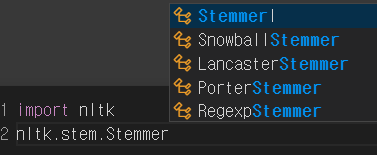
- nltk에서 stemming을 위한 여러 패키지를 제공하며, 그 중 하나인 porterstemmer을 사용해볼 예정
---
porterstemmer 규칙
- -alize -> -al [normalize : normal]
- -ance -> 제거 [endurenace : eudure]
- -ical -> -ic [logical : logic]
- s&es -> s 제거
- -y : -i로 변경
- e, te -> e 제거
- 등등

In [ ]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
text = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words = word_tokenize(text)
print(words)

porterstemmer = PorterStemmer()
print([porterstemmer.stem(word) for word in words])

In [ ]:
words=['formalize', 'allowance', 'electricical']
print(words)
print([porterstemmer.stem(w) for w in words])

## 영어 : Lemmatization(표제어 추출)
---
- 표제어 추출은, 단어 형태가 다르더라도 그 뿌리 단어를 찾아서 반환하므로 단어의 개수를 줄이고 빈도수를 높일 수 있음.
- 예를 들어, am, are, is는 다른 스펠링이지만 be동사의 다른 형태이므로 표제어인 be로 변환하여 추출됨

In [ ]:
nltk.download('wordnet')

In [ ]:
from nltk.stem import WordNetLemmatizer
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
wordnetlemmatizer = WordNetLemmatizer()
print(words)
print([wordnetlemmatizer.lemmatize(word) for word in words])

lives는 life로 잘 바뀌었지만, dies는 dy, has는 ha로 바뀐 것은 품사를 잘못이 판단했기 때문

## 한국어 : Stemming & Lemmatization(Okt가 제공)

In [ ]:
text = "북한은 하루새 3차례에 걸쳐 대미·대남 압박 메시지를 내놓았다."
print(okt.morphs(text))
print(okt.morphs(text, stem=True))
print(okt.pos(text))
print(okt.pos(text, stem=True))

In [ ]:
text = "웃기는 소리하지마랔ㅋㅋㅋ"
print(okt.morphs(text))
print(okt.morphs(text, norm=True))
print(okt.pos(text))
print(okt.pos(text, norm=True))

## 한국어 Norm : 반복되는 문자 정제(soynlp)
---
- soynlp는 복합 명사를 추출할 수 있는 토크나이저도 제공
- soynlp는 엄밀히 말해서 형태소 분석기는 아니고, 단어를 쪼개는 기능은 있지만, 학습기반으로 돌아가면서 내부적으로는 계속 같이 등장하는 단어는 하나로 인식

In [ ]:
!pip install soynlp

In [ ]:
from soynlp.normalizer import *

In [ ]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

print(repeat_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(repeat_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(repeat_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(repeat_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

- repeat_normalize는 단순하게 반복되는 단어에 대해서 줄여주는 기능을 수행
- emoticon_normalize는 반복되는 단어도 줄여주면서, 정규화를 진행

### 한국어 Norm : 맞춤법 교정(hanspell)
---
hanspell은 맞춤법 교정도 해주지만, 사실 띄어쓰기 교정도 해줌

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

In [ ]:
from hanspell import spell_checker
 
sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)
print(spelled_sent)
hanspell_sent = spelled_sent.checked
print(hanspell_sent)

In [ ]:
sent = '오지호는 극중 두 얼굴의 사나이 성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.'
sent1 = '오지호는 극중두얼굴의사나이성준 역을 맡았다. 성준은 국내 유일의 태백권 전승자를 가리는 결전의 날을 앞두고 20년간 동고동락한 사형인 진수(정의욱 분)를 찾으러 속세로 내려온 인물이다.'
new_sent = sent.replace(" ","")
print("정상 문장: ","\n", sent)
print("띄어쓰기가 일부만 안 된 문장: ","\n", sent1)
print("띄어쓰기가 안 된 문장: ","\n",new_sent)
print("Kospacing 결과: ","\n", spacing(new_sent))
print("Kospacing 결과(일부만 안 된 문장): ","\n", spacing(sent1))
print("Hanspell 결과: ","\n", spell_checker.check(new_sent).checked)
print("Hanspell 결과(일부만 안 된 문장): ","\n",spell_checker.check(sent1).checked)